In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
test_df = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv')
df = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv')

In [5]:
train_df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [6]:
test_df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98


In [7]:
df.head()

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5


In [8]:
train_df.shape

(19158, 14)

In [9]:
test_df.shape

(2129, 13)

In [10]:
df.head()

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5


In [11]:
df = train_df.copy()

In [12]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [13]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### Majority of features are categorical features. Lets explore more about our feature one by one

In [14]:
len(df['city'].unique())

123

### We have 123 diffrent cities 

In [15]:
len(df['relevent_experience'].unique())

2

In [16]:
df['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [17]:
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [18]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [19]:
df['major_discipline'].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [20]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

### Too many experiences lets get the count of Experience

In [21]:
len(df['experience'].unique())

23

In [22]:
df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [23]:
df['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [24]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [25]:
df['training_hours'].unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15,  98, 142,  28, 228,  29,  12,  17,  35,
         4, 136,  27,  74,  86,  75, 332, 140, 182, 172,  33,  34, 150,
       160,   3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164,
       290, 133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,
        11,  41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88,
       218,  62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44,
       110, 262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,
         9, 129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53,
       143, 124, 214, 288, 306, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11

In [26]:
len(df['training_hours'].unique())

241

In [27]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


<AxesSubplot:>

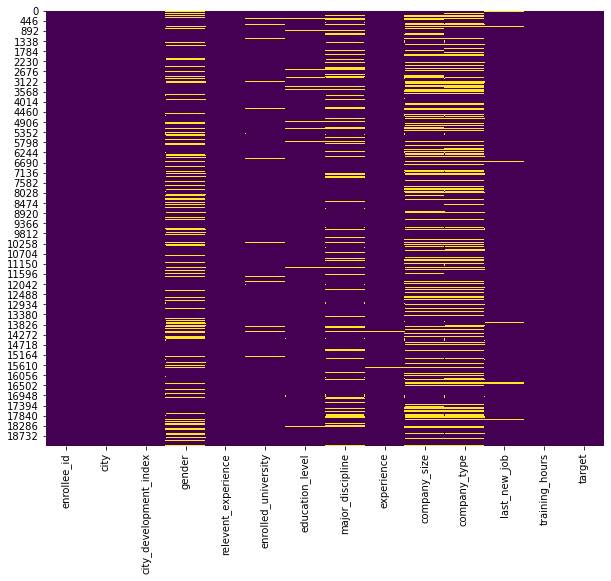

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna(),cmap='viridis',cbar=False)

### We have missing values in (Gender, enrolled_university, education level, major_discpline, experience, company_size, company_type, last_new_job)

### Lets explore how many features have nan values with their percentage.

In [29]:
missing_val = [feature for feature in df.columns if df[feature].isna().sum() > 1]

In [30]:
for feature in missing_val:
    print(feature," : ",np.round(df[feature].isnull().mean()*100,3),'% missing values')

gender  :  23.531 % missing values
enrolled_university  :  2.015 % missing values
education_level  :  2.401 % missing values
major_discipline  :  14.683 % missing values
experience  :  0.339 % missing values
company_size  :  30.995 % missing values
company_type  :  32.049 % missing values
last_new_job  :  2.208 % missing values


In [31]:
### Most of the features dtype is object which should be in integer type, Lets Convert them into integer

In [32]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [33]:
df['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

<AxesSubplot:xlabel='gender', ylabel='count'>

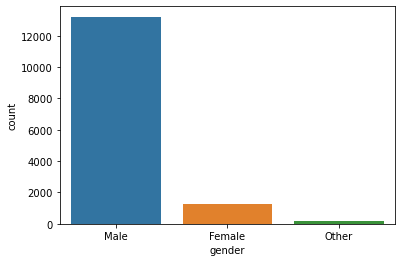

In [34]:
sns.countplot(x='gender',data=df)

### Lets Label All the missing values with other. Since we didnt have any clear picture about there gender

In [35]:
df['gender']=df['gender'].fillna('Other')

In [36]:
df['gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

### Now we don't have any missing values in Gender column

In [37]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [38]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [39]:
df['experience']=df['experience'].replace('>20','20')

In [40]:
df['experience']=df['experience'].replace('<1','1')

In [41]:
df['experience'].unique()

array(['20', '15', '5', '1', '11', '13', '7', '17', '2', '16', '4', '10',
       '14', '18', '19', '12', '3', '6', '9', '8', nan], dtype=object)

In [42]:
best_exp = df.mode()['experience'][0]
print(best_exp)

20


In [43]:
df['experience'] = df['experience'].fillna(best_exp)

In [44]:
df['experience'] = df['experience'].astype(float)

In [45]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0


In [46]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [47]:
df['last_new_job']=df['last_new_job'].replace('never',0)

In [48]:
frequent = df.mode()['last_new_job'][0]

In [49]:
df['last_new_job'] = df['last_new_job'].fillna(frequent)

In [50]:
df['last_new_job'] = df['last_new_job'].replace('>4',4)

In [51]:
df['last_new_job'] = df['last_new_job'].astype(float)

In [52]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

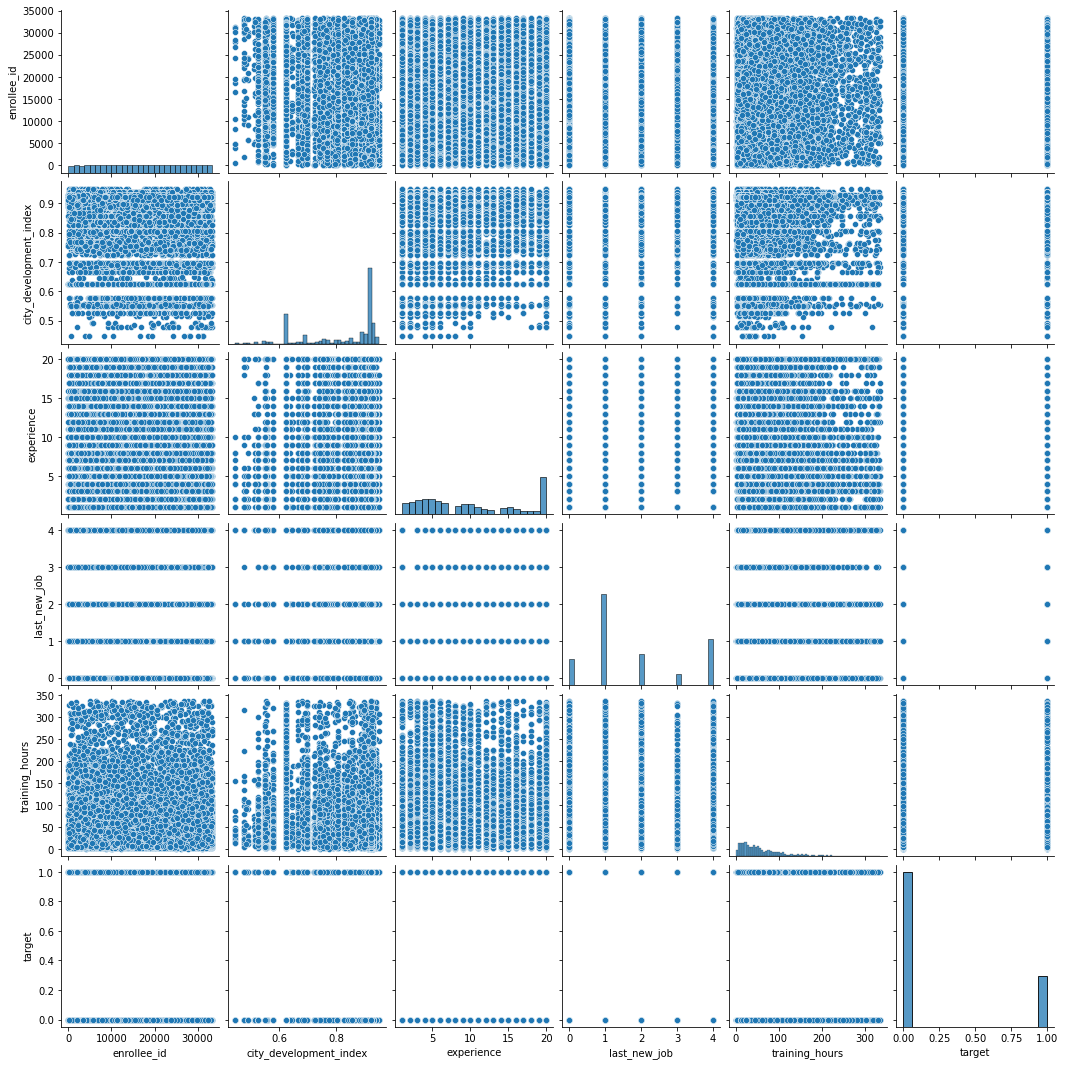

In [53]:
sns.pairplot(df)

<AxesSubplot:>

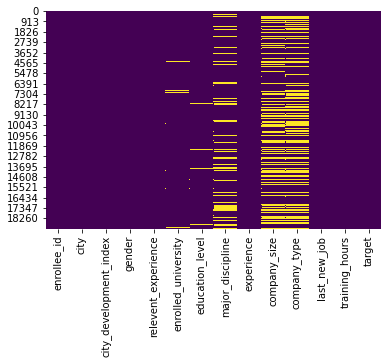

In [54]:
sns.heatmap(df.isna(),cbar=False,cmap='viridis')

In [55]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,4.0,47,0.0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='major_discipline', ylabel='count'>

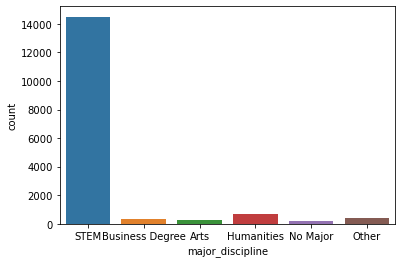

In [56]:
sns.countplot('major_discipline',data=df)

<AxesSubplot:xlabel='education_level', ylabel='count'>

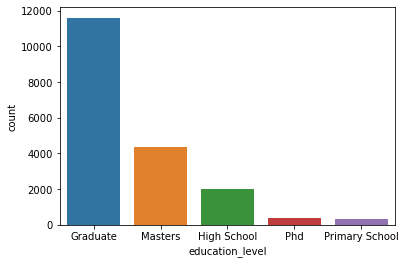

In [57]:
sns.countplot(x='education_level',data=df)

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

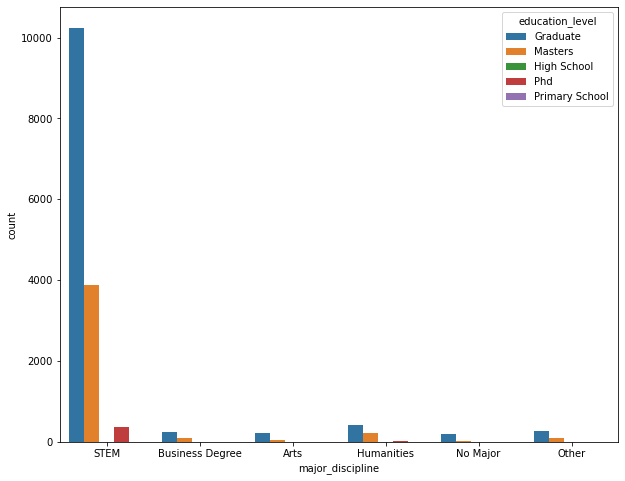

In [58]:
plt.figure(figsize=(10,8))
sns.countplot(x='major_discipline',hue='education_level',data=df)

In [59]:
df['major_discipline'].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [60]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [61]:
def fill_discpline(cols):
    discipline = cols[0]
    education = cols[1]
    if pd.isnull(discipline):
        if education == 'Graduate':
            return 'STEM'
        elif education == 'Masters':
            return 'Humanities'
        elif education == 'Phd':
            return 'STEM'
        else:
            return 'Other'
    else:
        return discipline

In [62]:
df['major_discipline'] = df[['major_discipline','education_level']].apply(fill_discpline,axis=1)

In [63]:
df['major_discipline'].unique()

array(['STEM', 'Business Degree', 'Other', 'Arts', 'Humanities',
       'No Major'], dtype=object)

In [64]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,4.0,47,0.0


<AxesSubplot:xlabel='company_size', ylabel='count'>

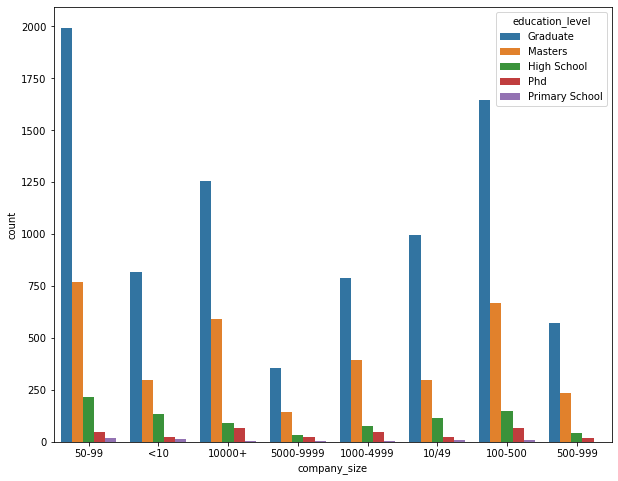

In [65]:
plt.figure(figsize=(10,8))
sns.countplot(x='company_size',hue='education_level',data=df)

In [66]:
company_type = df.mode()['company_type'][0]
print(company_type)

Pvt Ltd


In [67]:
df['company_type'] = df['company_type'].fillna(company_type)

In [68]:
company_size = df.mode()['company_size'][0]
print(company_size)

50-99


In [69]:
df['company_size'] = df['company_size'].fillna(company_size)

<AxesSubplot:>

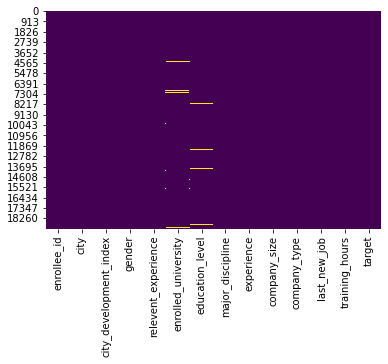

In [70]:
sns.heatmap(df.isna(),cbar=False,cmap='viridis')

In [71]:
missing_val = [feature for feature in df.columns if df[feature].isna().sum() > 1]

In [72]:
for feature in missing_val:
    print(feature," : ",np.round(df[feature].isnull().mean()*100,3),'% missing values')

enrolled_university  :  2.015 % missing values
education_level  :  2.401 % missing values


In [73]:
#df.reset_index(inplace=True)

In [74]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,4.0,47,0.0


In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()

In [77]:
df['city'] = le.fit_transform(df['city'])

In [78]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder() 

In [79]:
gender = pd.get_dummies(df['gender'])

In [80]:
df = pd.concat([df,gender],axis=1)

In [81]:
df = df.drop('gender',axis=1)

In [82]:
df.head(2)

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Female,Male,Other
0,8949,5,0.920,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,1.0,36,1.0,0,1,0
1,29725,77,0.776,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,4.0,47,0.0,0,1,0


In [83]:
df['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [84]:
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [85]:
df['company_type'].unique()

array(['Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [86]:
df['company_size'].unique()

array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [87]:
experience = pd.get_dummies(df['relevent_experience'],drop_first=True)
univercities = pd.get_dummies(df['enrolled_university'],drop_first=True)

In [88]:
df = pd.concat([df,experience,univercities],axis=1)

In [89]:
df = df.drop(['relevent_experience','enrolled_university'],axis=1)

In [90]:
df.head(2)

,enrollee_id,city,city_development_index,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Female,Male,Other,No relevent experience,Part time course,no_enrollment
0,8949,5,0.920,Graduate,STEM,20.0,50-99,Pvt Ltd,1.0,36,1.0,0,1,0,0,0,1
1,29725,77,0.776,Graduate,STEM,15.0,50-99,Pvt Ltd,4.0,47,0.0,0,1,0,1,0,1


In [91]:
df['company_type'] = le.fit_transform(df['company_type'])
df['company_size'] = le.fit_transform(df['company_size'])

In [92]:
df.head(2)

,enrollee_id,city,city_development_index,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Female,Male,Other,No relevent experience,Part time course,no_enrollment
0,8949,5,0.920,Graduate,STEM,20.0,4,5,1.0,36,1.0,0,1,0,0,0,1
1,29725,77,0.776,Graduate,STEM,15.0,4,5,4.0,47,0.0,0,1,0,1,0,1


In [93]:
df['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [94]:
most_frequent = df.mode()['education_level'][0]

In [95]:
df['education_level'] = df['education_level'].fillna(most_frequent)

In [96]:
education = {'Graduate':3,'Masters':4,'High School':2,'Primary School':1,'Phd':5}

In [97]:
df['education_level'].replace(education,inplace=True)

In [98]:
df['major_discipline'].unique()

array(['STEM', 'Business Degree', 'Other', 'Arts', 'Humanities',
       'No Major'], dtype=object)

In [99]:
df['major_discipline'] = le.fit_transform(df['major_discipline'])

In [100]:
df.head(2)

,enrollee_id,city,city_development_index,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Female,Male,Other,No relevent experience,Part time course,no_enrollment
0,8949,5,0.920,3,5,20.0,4,5,1.0,36,1.0,0,1,0,0,0,1
1,29725,77,0.776,3,5,15.0,4,5,4.0,47,0.0,0,1,0,1,0,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int64  
 2   city_development_index  19158 non-null  float64
 3   education_level         19158 non-null  int64  
 4   major_discipline        19158 non-null  int64  
 5   experience              19158 non-null  float64
 6   company_size            19158 non-null  int64  
 7   company_type            19158 non-null  int64  
 8   last_new_job            19158 non-null  float64
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  float64
 11  Female                  19158 non-null  uint8  
 12  Male                    19158 non-null  uint8  
 13  Other                   19158 non-null  uint8  
 14  No relevent experience  19158 non-null

In [102]:
os.listdir()

['__notebook_source__.ipynb']

In [103]:
df.to_csv('my_train.csv')

### Now we have completed Data Pre proccessing and Moing towards Feature Selection

In [104]:
df = pd.read_csv('my_train.csv',index_col=False)

In [105]:
df = df.iloc[:,1:]

In [106]:
df.head()

,enrollee_id,city,city_development_index,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Female,Male,Other,No relevent experience,Part time course,no_enrollment
0,8949,5,0.920,3,5,20.0,4,5,1.0,36,1.0,0,1,0,0,0,1
1,29725,77,0.776,3,5,15.0,4,5,4.0,47,0.0,0,1,0,1,0,1
2,11561,64,0.624,3,5,5.0,4,5,0.0,83,0.0,0,0,1,1,0,0
3,33241,14,0.789,3,1,1.0,4,5,0.0,52,1.0,0,0,1,1,0,0
4,666,50,0.767,4,5,20.0,4,1,4.0,8,0.0,0,1,0,0,0,1


<AxesSubplot:>

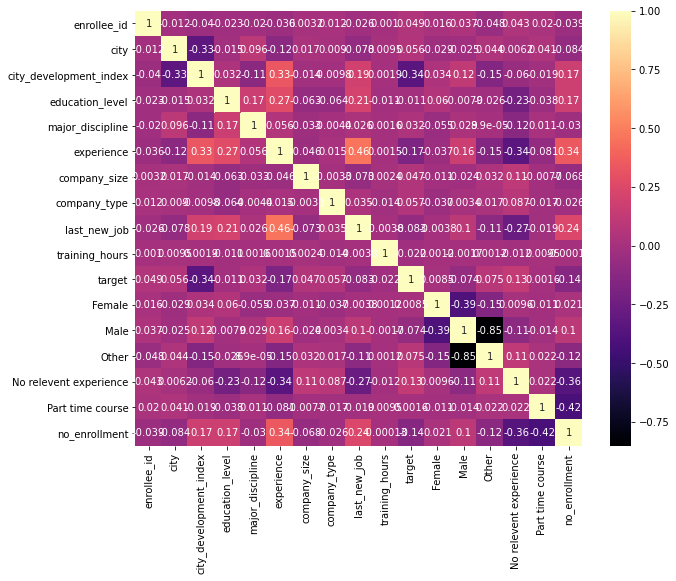

In [107]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='magma')

<AxesSubplot:xlabel='target', ylabel='count'>

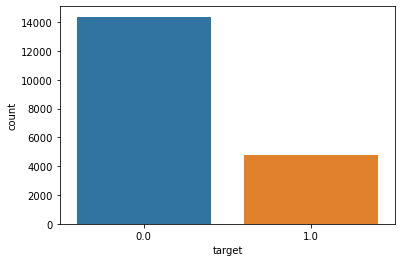

In [108]:
sns.countplot(x='target',data=df)

### We have imbalance Dataset

In [109]:
X = df.drop('target',axis=1)
y = df['target']

In [110]:
from imblearn.over_sampling import RandomOverSampler

In [111]:
X.shape

(19158, 16)

In [112]:
y.shape

(19158,)

In [113]:
oversample = RandomOverSampler(sampling_strategy='minority',random_state=0)

In [114]:
X_over,y_over=oversample.fit_resample(X,y)

In [115]:
X_over.shape

(28762, 16)

In [116]:
y_over.shape

(28762,)

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over)

In [119]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [120]:
feature_selection = SelectFromModel(Lasso(alpha=0.03,random_state=0))
feature_selection.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.03, random_state=0))

In [121]:
feature_selection.get_support()

array([False,  True, False, False, False,  True,  True,  True, False,
        True, False, False, False, False, False, False])

In [122]:
X_train = feature_selection.transform(X_train)
X_test = feature_selection.transform(X_test)

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
logistic = LogisticRegression()

In [125]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [126]:
from sklearn.metrics import classification_report,confusion_matrix

In [127]:
y_pred = logistic.predict(X_test)

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.53      0.56      3636
         1.0       0.57      0.65      0.61      3555

    accuracy                           0.59      7191
   macro avg       0.59      0.59      0.59      7191
weighted avg       0.59      0.59      0.59      7191



In [129]:
print(confusion_matrix(y_test,y_pred))

[[1917 1719]
 [1233 2322]]


In [136]:
from sklearn.ensemble import RandomForestClassifier
rf_regressor = RandomForestClassifier()

In [137]:
n_estimators = [int(x) for x in np.linspace(start=100, stop = 800, num=8)]
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
max_features=['auto','sqrt']
min_samples_split= [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [138]:
random_grid = {'n_estimators':n_estimators,
         'max_depth':max_depth,
         'max_features':max_features,
         'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [139]:
from sklearn.model_selection import RandomizedSearchCV
rcv_regressor = RandomizedSearchCV(estimator = rf_regressor, param_distributions = random_grid, n_iter = 100 , scoring = 'neg_mean_squared_error', n_jobs = 1,cv = 5, verbose = 2,random_state = 101)

In [140]:
rcv_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   9.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   9.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=  10.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   9.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   9.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimat

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   7.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   5.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=  11.3s
[CV] END max_depth=25, max_featu

[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.6s
[CV] END max_depth=25, max_features=

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   3.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   3.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   3.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   4.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   3.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   3.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   3.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   3.3s
[CV] END max_depth=30, max_features=sq

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   7.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   6.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  10.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  11.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  10.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  10.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=  10.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   4.6s
[CV] END max_depth=20, max_features=aut

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   3.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=5, max_features=s

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   3.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   3.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   3.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   8.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   8.3s
[CV] END max_depth=20, max_features=

[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   5.8s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   5.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   5.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   3.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   3.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   4.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   3.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   3.3s
[CV] END max_depth=25, max_features=auto

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   random_state=101, scoring='neg_mean_squared_error',
                   verbose=2)

In [141]:
rcv_regressor.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [142]:
model = RandomForestClassifier(n_estimators=700,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=25)

In [143]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=700)

In [144]:
y_pred = model.predict(X_test)

In [145]:
print(confusion_matrix(y_test,y_pred))

[[2877  759]
 [ 251 3304]]


In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85      3636
         1.0       0.81      0.93      0.87      3555

    accuracy                           0.86      7191
   macro avg       0.87      0.86      0.86      7191
weighted avg       0.87      0.86      0.86      7191

